## DRILL - Exploring the Central Limit Theorem

In [27]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import random
%matplotlib inline

First, I will make the population as per the requirments of:

population_1 (n = 10, p = 0.2, size = 10000)
population_2 (n = 10, p = 0.5, size = 10000)


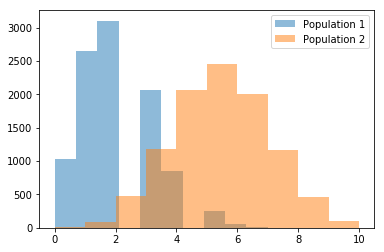

In [28]:
random.seed(2402)
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

Here, samples of 100 were drawn as in the lesson. 

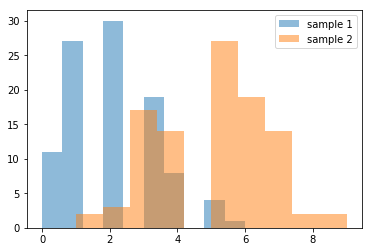

In [29]:
random.seed(2402)
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

### Task  1:

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

* ##### My expectations:

as we increase the samples size, our means and standard deviations will be a more accurate representation of the population mean. Also, the t-value and p-value will be closer to the z-value. 

as we decrease our samples the opposite will happen, there will be less accuracy in the mean and standard deviations, which will cause the standard error to increase.

The real answer is as follows:

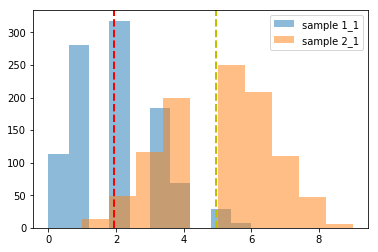

1.931
4.964
1.24909527259
1.57565986177
3.033


In [30]:
## Samples of 1000
random.seed(2402)
sample1_1 = np.random.choice(pop1, 1000, replace=True)
sample2_1 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1_1, alpha=0.5, label='sample 1_1') 
plt.hist(sample2_1, alpha=0.5, label='sample 2_1') 
plt.axvline(sample1_1.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(sample2_1.mean(), color='y', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
plt.show()

print(sample1_1.mean())
print(sample2_1.mean())
print(sample1_1.std())
print(sample2_1.std())

# Compute the difference between the two sample means.
diff = sample2_1.mean( ) - sample1_1.mean()
print(diff)


In [31]:
## compute the T-value
print(ttest_ind(sample2_1, sample1_1, equal_var=False))

Ttest_indResult(statistic=47.676717307574627, pvalue=0.0)


Refrence: 
from the lesson the values of the samples of 100 are:

* 1.85
* 5.02
* 1.32193040664
* 1.62468458477
* 3.17
* Ttest_indResult(statistic=15.968176007367394, pvalue=7.4958290644481136e-36)


As we can see the values of the means are closer to the theoretical mean (Population means), even the standrad deviation has decreased slightly. The t-test has returned a higher t statistic and a very small p-value, showing that the difference between the two means is due to a real difference between them. 


Next we will decrease the sample size and see what happens:

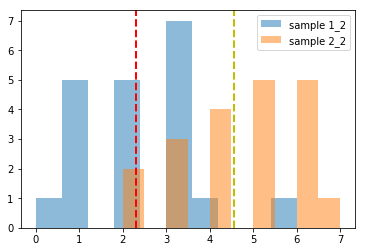

2.3
4.55
1.30766968306
1.3955285737
2.25


In [32]:
## Samples of 20
random.seed(2402)
sample1_2 = np.random.choice(pop1, 20, replace=True)
sample2_2 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1_2, alpha=0.5, label='sample 1_2') 
plt.hist(sample2_2, alpha=0.5, label='sample 2_2') 
plt.axvline(sample1_2.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(sample2_2.mean(), color='y', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
plt.show()

print(sample1_2.mean())
print(sample2_2.mean())
print(sample1_2.std())
print(sample2_2.std())

# Compute the difference between the two sample means.
diff = sample2_2.mean( ) - sample1_2.mean()
print(diff)

In [33]:
## compute the T-value
print(ttest_ind(sample2_2, sample1_2, equal_var=False))

Ttest_indResult(statistic=5.1282259406837074, pvalue=8.9799053238053904e-06)


As is shown from the above figure, and list of results that the mean and Standard deviations (SD) have grown further from the accurate estimation of the population mean and SD. 

The t-test has returned a smaller t-statitic, and a larger p-value, however we can still draw the same conclusion as in the other case, since the t-statistic is made for cases with low samples relative to the z-statistic. 

### Task  2:

Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

* ##### My expectations:

as we increase the population probability (p in the NumPy documentation) , getting closer to the mean of the second population, we will see a decrease in variablity, which means that the t-value will get smaller and p-value will increase. the more we get closer to the second populations mean


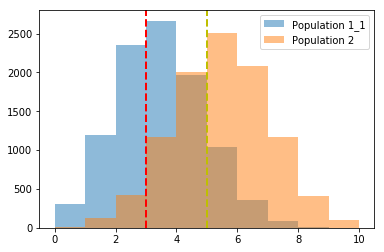

In [34]:
random.seed(2402)
pop1_1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1_1, alpha=0.5, label='Population 1_1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.axvline(pop1_1.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(pop2.mean(), color='y', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
plt.show()

In [35]:
## compute the T-value for samples of 1000 from both populations:
random.seed(2402)
t_sample1 = np.random.choice(pop1_1, 1000, replace=True)
t_sample2 = np.random.choice(pop2, 1000, replace=True)


print(ttest_ind(t_sample2, t_sample1, equal_var=False))

Ttest_indResult(statistic=29.465489245512327, pvalue=2.8146291428100684e-158)


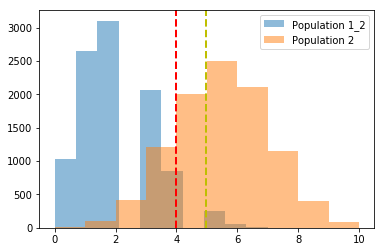

In [36]:
random.seed(2402)
pop1_2 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1_2') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.axvline(pop1_2.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(pop2.mean(), color='y', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
plt.show()

In [37]:
## compute the T-value for samples of 1000 from both populations:
random.seed(2402)
t_sample3 = np.random.choice(pop1_2, 1000, replace=True)
t_sample4 = np.random.choice(pop2, 1000, replace=True)


print(ttest_ind(t_sample4, t_sample3, equal_var=False))

Ttest_indResult(statistic=13.883829450774671, pvalue=6.577143310926245e-42)


1. Ttest_indResult(statistic=29.465489245512327, pvalue=2.8146291428100684e-158)
2. Ttest_indResult(statistic=13.883829450774671, pvalue=6.577143310926245e-42)



from the above figures, it is clear how the proability value which is where we derive our mean has led to a difference in the t-value outcomes showing that the closer the means of the samples are, the smaller the t-value gets, which is what we expect since the number of standard errors between the two means is lower for means that are closer to each other. 

### Task 3:


Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

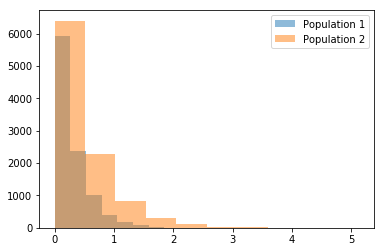

In [40]:
random.seed(2402)
pop1 = np.random.exponential(0.3, 10000)
pop2 = np.random.exponential(0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

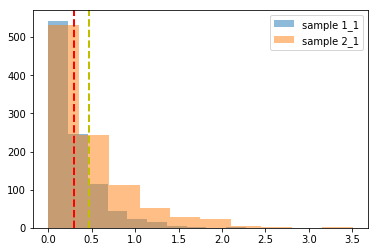

0.293784600414
0.471510544303
0.297237730412
0.473378387856
0.17772594389


In [41]:
## Samples of 1000
random.seed(2402)
sample1_1 = np.random.choice(pop1, 1000, replace=True)
sample2_1 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1_1, alpha=0.5, label='sample 1_1') 
plt.hist(sample2_1, alpha=0.5, label='sample 2_1') 
plt.axvline(sample1_1.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(sample2_1.mean(), color='y', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
plt.show()

print(sample1_1.mean())
print(sample2_1.mean())
print(sample1_1.std())
print(sample2_1.std())

# Compute the difference between the two sample means.
diff = sample2_1.mean( ) - sample1_1.mean()
print(diff)


the mean of each sample is a good estimate of the mean of the population, in this case it Beta or 1/Lambda
